<a href="https://colab.research.google.com/github/diegosalinas04/Actividad-2-Valores-nulos/blob/main/Actividad__3_(ValoresAt%C3%ADpicos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
files.upload()

Saving Ventas_totales (1).csv to Ventas_totales (1) (1).csv


{'Ventas_totales (1) (1).csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288

In [ ]:
data= pd.read_csv('Ventas_totales (1).csv')
data

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [9]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           65 non-null     int64  
 1   indice_tiempo                        65 non-null     object 
 2   ventas_precios_corrientes            65 non-null     float64
 3   ventas_precios_constantes            65 non-null     float64
 4   ventas_totales_canal_venta           65 non-null     float64
 5   salon_ventas                         65 non-null     float64
 6   canales_on_line                      65 non-null     float64
 7   ventas_totales_medio_pago            65 non-null     float64
 8   efectivo                             65 non-null     float64
 9   tarjetas_debito                      65 non-null     float64
 10  tarjetas_credito                     65 non-null     float64
 11  otros_medios                      

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [0, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [1]]
Cualitativas

<Figure size 1500x800 with 0 Axes>

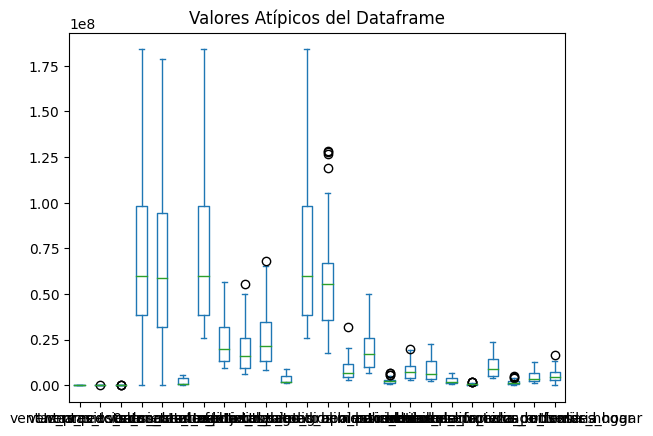

In [12]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [14]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
# los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [16]:
#Volvemos a corroborar valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

Unnamed: 0                             0
ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

In [18]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0                             0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Obtenemos datos limpios del Dataframe
Datos_sin_Outliers_iqr= Cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Datos_sin_Outliers_iqr

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_iqr=Datos_sin_Outliers_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
data_clean_iqr

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean_iqr.isnull().sum()
valores_nulos

UNIÓN DE DATAFRAME CUANTITATIVO CON DATAFRAME CUALITATIVO

In [ ]:
Dataframe_final = pd.concat([Cualitativas, data_clean_iqr], axis=1)
Dataframe_final

In [25]:
#Convertir DataFrame a CSV
Dataframe_final.to_csv("Dataframe_procesado.csv")

In [26]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Dataframe_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>